In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Root finding

We want to find the value of $x$ such that $f(x) = 0$, for a general function $f(x)$.  This is the *root-finding* problem.

There are lots of different methods for finding roots.  We'll look at 2.

Let's start by trying to find the root of 

$$f(x) = \frac{1}{2} x^3 - \frac{\pi}{3}x + 2$$



In [24]:
def f(x):
    return 0.5*x**3 - np.pi/3 * x + 2

## Bisection

Let's start by plotting the function&mdash;we already have a decision to make.  We want to pick a range where we expect there to be a root.  So we will make a somewhat generous range.

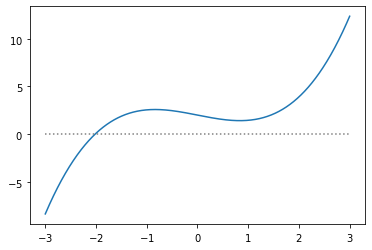

In [25]:
x = np.linspace(-3, 3, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)

# plot our function
ax.plot(x, f(x))

# also plot y = 0, so we can see visually where the root lies
ax.plot(x, 0*x, linestyle=":", color="0.5")

Notice from this that the function crosses $y = 0$ near $x = -2$.  So just from the graph we have an approximation of the root.

But also notice that to the left of the root, $f(x) < 0$, and to the right of the root, $f(x) > 0$.  

So we can locate the root by looking for the region where $f(x)$ changes sign.  This is what bisection does&mdash;we pick an interval where we expect there to be a root and we narrow the interval by looking for the half-interval where $f(x)$ still changes sign.

Looking at the plot, we expect that the root lies between $[-3, -1]$&mdash;we'll call these the left and right points $x_l$ and $x_r$.

We can be sure by looking at the function values at those two points and checking if it indeed changes sign.

In [27]:
xl = -3
xr = -1

print(f(xl), f(xr))

-8.358407346410207 2.5471975511965974


It does!.  Now we can try to narrow the range.  For the bisection method, we'll look at the point in the middle (we'll call that $x_m$):

In [29]:
xm = 0.5 * (xl + xr)
print(f(xm))

0.09439510239319526


$f(x_m) > 0$ just like $f(x_r)$, therefore, it must be the case that that our root, $x_0 \in [x_l, x_m]$.

So we now have cut the range in half.  We can then repeat this process, each time cutting the range where the root lies in half.  Once the interval containing the root is small enough (e.g., the width is less than the error with which we want to know the root), then we stop.

Let's code this idea up

In [30]:
def bisect(xl, xr, func, tol=1.e-8):
    """find the zero of func(x) in the interval [xl, xr]"""
    
    # first check if there is a root in the interval
    fl = func(xl)
    fr = func(xr)
    
    if fl * fr > 0:
        print("no root in the interval")
        return None
    
    # now setup our iteration loop.  We will keep looping until
    # the relative error is < tol
    err = 1.e10
    xm = 0.5 * (xl + xr)

    while err > tol:
        fm = func(xm)
        
        if fl*fm > 0:
            # the root is in the right half of the interval
            xl = xm
            fl = fm
        else:
            # the root is in the left half of the interval
            xr = xm
            fr = fm
        
        xm = 0.5 * (xl + xr)
        err = np.abs(xr - xl) / np.abs(xm)
        
    return xm

In [32]:
bisect(-3, -1, f)

-2.0188431814312935

In [34]:
bisect(-3, -1, f, tol=1.e-3)

-2.0185546875

## Newton-Raphson